### CNN
- Feature Extractor: {Conv layer + Pool layer} 들의 조합
- Classifier: Flat layer + {Dense layer + Dropout layer}
> Dropout layer: overfitting 방지

##### Conv2D(input_shape, @required kernel_size, @required filters, strides, activation, user_bias, padding)
- input_shape: (h, w, in_channels) 
> 1st conv layer에서만 필수
- kernel_size: (fh, fw)
- filters: filter 개수
- strides: (1,1) : strides = 1
- activation: ex. relu
- padding: 'VALID' or 'SAME' 
> - VALID: conv 연산 결과 shape이 축소된 data return 
> - SAME: conv 연산 결과 shape == input data shape을 return 

##### MaxPool2D(pool_size, padding)
- pool_size: ex. (2,2)

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam

import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
# 텐서로 변환, 정규화
x_train = x_train.reshape(-1,28,28,1) / 255.0
x_test = x_test.reshape(-1,28,28,1) / 255.0

In [4]:
mnist_cnn = Sequential()

In [5]:
# Feature Extractor
mnist_cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3), filters=32, activation='relu', padding='same'))
mnist_cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu', padding='same'))
mnist_cnn.add(MaxPool2D(pool_size=(2,2)))
mnist_cnn.add(Dropout(0.25))

In [6]:
# Classifier
mnist_cnn.add(Flatten())
mnist_cnn.add(Dense(128, activation='relu'))
mnist_cnn.add(Dropout(0.5))
mnist_cnn.add(Dense(10, activation='softmax'))

In [7]:
mnist_cnn.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
mnist_cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               1605760   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [9]:
hist = mnist_cnn.fit(x_train, y_train, epochs=30, validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 72s 48ms/step - loss: 0.4739 - accuracy: 0.8325 - val_loss: 0.3136 - val_accuracy: 0.8807
Epoch 2/30
1500/1500 [==============================] - 68s 45ms/step - loss: 0.3110 - accuracy: 0.8896 - val_loss: 0.2510 - val_accuracy: 0.9065
Epoch 3/30
1500/1500 [==============================] - 69s 46ms/step - loss: 0.2607 - accuracy: 0.9047 - val_loss: 0.2289 - val_accuracy: 0.9112
Epoch 4/30
1500/1500 [==============================] - 72s 48ms/step - loss: 0.2312 - accuracy: 0.9152 - val_loss: 0.2191 - val_accuracy: 0.9202
Epoch 5/30
1500/1500 [==============================] - 70s 47ms/step - loss: 0.2020 - accuracy: 0.9248 - val_loss: 0.2227 - val_accuracy: 0.9157
Epoch 6/30
1500/1500 [==============================] - 70s 47ms/step - loss: 0.1830 - accuracy: 0.9333 - val_loss: 0.2179 - val_accuracy: 0.9247
Epoch 7/30
1500/1500 [==============================] - 71s 47ms/step - loss: 0.1683 - accuracy: 0.9373 - val_loss: 0.2178 -

In [10]:
mnist_cnn.evaluate(x_test, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 0.3732 - accuracy: 0.9283


[0.3732353448867798, 0.9283000230789185]

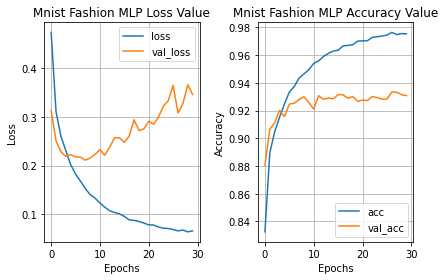

In [11]:
import matplotlib.pyplot as plt

plt.subplot(1,2,1)

plt.title("Mnist Fashion MLP Loss Value")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()

plt.plot(hist.history["loss"], label="loss")
plt.plot(hist.history["val_loss"], label="val_loss")

plt.legend(loc='best')

plt.subplot(1,2,2)

plt.title("Mnist Fashion MLP Accuracy Value")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid()

plt.plot(hist.history["accuracy"], label="acc")
plt.plot(hist.history["val_accuracy"], label="val_acc")

plt.legend(loc='best')

plt.tight_layout()

In [12]:
fashion_item = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shift",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}

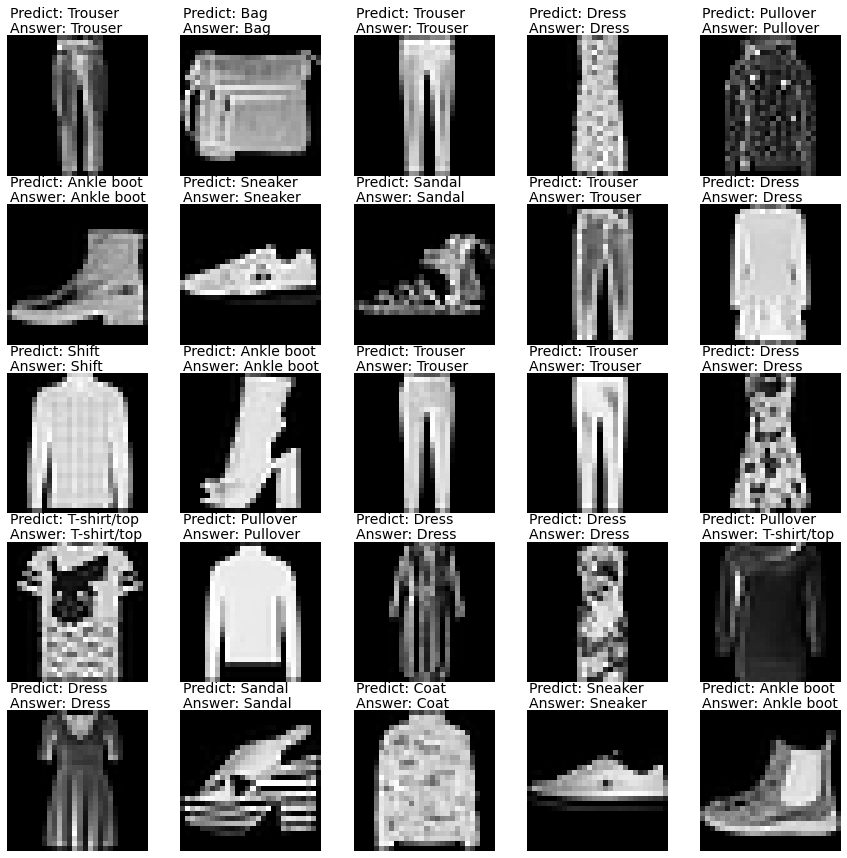

In [15]:
plt.figure(figsize=(15,15))
total_idx = len(x_test)

for i in range(25):
    plt.subplot(5,5,i+1)
    idx = np.random.randint(total_idx)
    img = x_test[idx]
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
    item_idx = np.argmax(mnist_cnn.predict(np.array([x_test[idx]])))
    
    predict = fashion_item[item_idx]
    answer = fashion_item[y_test[idx]]
    
    plt.text(0, -4, "Predict: %s" % (predict), fontsize=14)
    plt.text(0, -1, "Answer: %s" % (answer), fontsize=14)

plt.show()

##### Result
- ANN accuracy(Epochs=30): 0.8799
- CNN accuracy: 0.9283